In [38]:
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy
import sqlite3
from py2neo import Graph, Node, Relationship
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [39]:
engine = create_engine('sqlite:///db_subreddit.db')
engine1 = create_engine('sqlite:///db_subreddit1.db')

In [3]:
%%time
chunk_size = 10000
x = 0
y = 1
for df_new in pd.read_csv('reddit_body_final.csv', chunksize=chunk_size, iterator=True):
    df_new = df_new.rename(columns={c: c.replace(' ', '') for c in df_new.columns})
    df_new.index += y
    x+=1
    df_new.to_sql('subreddit', engine, if_exists='append')
    y = df_new.index[-1] + 1

Wall time: 8.92 s


In [3]:
conn = sqlite3.connect('db_subreddit.db')
conn1 = sqlite3.connect('db_subreddit1.db')

In [4]:
df_2014 = pd.read_sql_query('select TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count(*) as count from subreddit where YEAR = 2014 group by TARGET_SUBREDDIT order by count desc limit 1', conn)

In [5]:
df_2014

,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count
0,askreddit,1vm334s,19-01-2014 12:01,1,2014,316


In [6]:
df_2015 = pd.read_sql_query('select TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count(*) as count from subreddit where YEAR = 2015 group by TARGET_SUBREDDIT order by count desc limit 1', conn)
df_2016 = pd.read_sql_query('select TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count(*) as count from subreddit where YEAR = 2016 group by TARGET_SUBREDDIT order by count desc limit 1', conn)
df_2017 = pd.read_sql_query('select TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count(*) as count from subreddit where YEAR = 2017 group by TARGET_SUBREDDIT order by count desc limit 1', conn)

In [7]:
df_2015

,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count
0,askreddit,30pg5ms,25-03-2015 07:50,1,2015,174


In [8]:
df_2016

,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count
0,mhoc,4725u8s,25-02-2016 00:29,1,2016,170


In [9]:
df_2017

,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count
0,writingprompts,5n7zxas,11-01-2017 09:32,1,2017,71


In [17]:
#df_all = pd.read_sql_query('select * from subreddit',conn)
df_2014_new = pd.read_sql_query('select * from subreddit where TARGET_SUBREDDIT = "askreddit" and YEAR = 2014',conn)
df_2014_new

,level_0,Unnamed:0,index,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,Unnamed:9,...,Unnamed:105,Unnamed:106,Unnamed:107,Unnamed:108,Unnamed:109,Unnamed:110,Unnamed:111,Unnamed:112,Unnamed:113,YEAR
0,38,2440,2441,195,askreddit,1vm334s,19-01-2014 12:01,1,"104.0,104.0,0.788461538462,0.0192307692308,0.0...",None,...,None,None,None,None,None,None,None,None,None,2014
1,41,43239,143240,1984isreality,askreddit,2gek2js,23-09-2014 08:35,1,"1132.0,962.0,0.765901060071,0.00795053003534,0...",None,...,None,None,None,None,None,None,None,None,None,2014
2,114,546,547,3amjokes,askreddit,1ujnvds,06-01-2014 10:50,1,"103.0,103.0,0.757281553398,0.0194174757282,0.0...",None,...,None,None,None,None,None,None,None,None,None,2014
3,190,1105,1106,6000jokes,askreddit,1uvg0gs,09-01-2014 21:36,1,"291.0,264.0,0.780068728522,0.00687285223368,0....",None,...,None,None,None,None,None,None,None,None,None,2014
4,210,23501,53502,7cupsoftea,askreddit,26g007s,24-05-2014 14:32,1,"479.0,412.0,0.770354906054,0.0125260960334,0.0...",None,...,None,None,None,None,None,None,None,None,None,2014
5,253,58912,208913,a_squatch,askreddit,2oo4whs,08-12-2014 14:12,1,"119.0,118.0,0.789915966387,0.0168067226891,0.0...",None,...,None,None,None,None,None,None,None,None,None,2014
6,308,4720,4721,abuse,askreddit,1wvkzhs,04-02-2014 08:24,1,"141.0,134.0,0.744680851064,0.0141843971631,0.0...",None,...,None,None,None,None,None,None,None,None,None,2014
7,310,20214,50215,abuseporn2,askreddit,24ukxks,06-05-2014 09:13,1,"110.0,110.0,0.763636363636,0.0272727272727,0.0...",None,...,None,None,None,None,None,None,None,None,None,2014
8,332,2074,2075,accidentalvampire,askreddit,1vea13s,15-01-2014 23:39,1,"788.0,668.0,0.780456852792,0.00126903553299,0....",None,...,None,None,None,None,None,None,None,None,None,2014
9,335,10315,20316,accounting,askreddit,200fjas,09-03-2014 19:44,1,"283.0,250.0,0.780918727915,0.00706713780919,0....",None,...,None,None,None,None,None,None,None,None,None,2014


In [36]:

uri = "bolt://localhost:7687"
user = "neo4j"
password = "9936"
graph = Graph(uri = uri, user = user, password = password)
graph.delete_all
tx = graph.begin()


for i in range(len(df_all)):
    src = Node('Subreddit', name = str(df_all['SOURCE_SUBREDDIT'][i]),id = str(df_all['SOURCE_SUBREDDIT'][i]))
    tx.merge(src,'Subreddit','name')
    trg = Node('Subreddit', name = str(df_all['TARGET_SUBREDDIT'][i]), id = str(df_all['TARGET_SUBREDDIT'][i]))
    tx.merge(trg,'Subreddit', 'name')
    rel = Relationship(src, str(df_all['LINK_SENTIMENT'][i]),trg)
    tx.create(rel)

tx.commit()

In [55]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "9936"
graph = Graph(uri = uri, user = user, password = password)
graph.delete_all
tx = graph.begin()

In [10]:
df_1 = df_2014.append(df_2015, ignore_index = True)
df_1 = df_1.append(df_2016, ignore_index = True)
df_1 = df_1.append(df_2017, ignore_index = True)

In [11]:
df_1

,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEAR,count
0,askreddit,1vm334s,19-01-2014 12:01,1,2014,316
1,askreddit,30pg5ms,25-03-2015 07:50,1,2015,174
2,mhoc,4725u8s,25-02-2016 00:29,1,2016,170
3,writingprompts,5n7zxas,11-01-2017 09:32,1,2017,71


Wall time: 485 ms


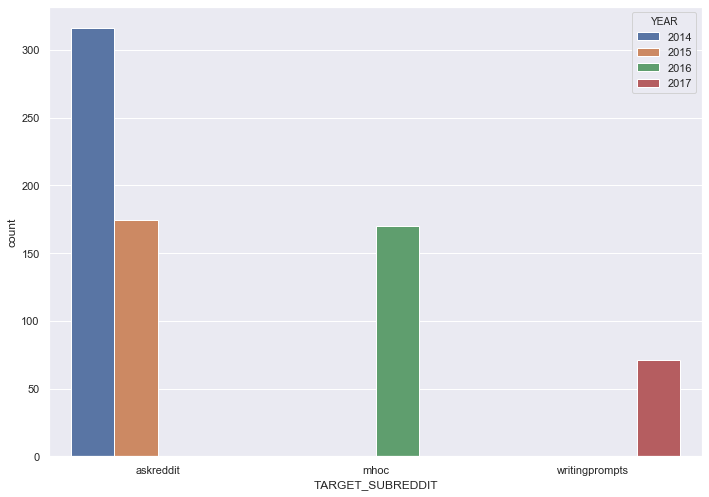

In [40]:
%%time
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='TARGET_SUBREDDIT', y='count', data=df_1,hue = 'YEAR')

In [30]:
df_2014_src = pd.read_sql_query('select SOURCE_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEARS,count(*) as count from subreddit1 where YEARS = 2014 group by SOURCE_SUBREDDIT order by count desc limit 1', conn1)
df_2015_src = pd.read_sql_query('select SOURCE_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEARS,count(*) as count from subreddit1 where YEARS = 2015 group by SOURCE_SUBREDDIT order by count desc limit 1', conn1)
df_2016_src = pd.read_sql_query('select SOURCE_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEARS,count(*) as count from subreddit1 where YEARS = 2016 group by SOURCE_SUBREDDIT order by count desc limit 1', conn1)
df_2017_src = pd.read_sql_query('select SOURCE_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEARS,count(*) as count from subreddit1 where YEARS = 2017 group by SOURCE_SUBREDDIT order by count desc limit 1', conn1)

In [15]:
%%time
chunk_size = 10000
x = 0
y = 1
for df_new in pd.read_csv('reddit-body-all.csv', chunksize=chunk_size, iterator=True):
    df_new = df_new.rename(columns={c: c.replace(' ', '') for c in df_new.columns})
    df_new.index += y
    x+=1
    df_new.to_sql('subreddit1', engine1, if_exists='append')
    y = df_new.index[-1] + 1

Wall time: 1min 42s


In [31]:
df = df_2014_src.append(df_2015_src, ignore_index = True)
df = df.append(df_2016_src, ignore_index = True)
df = df.append(df_2017_src, ignore_index = True)

,SOURCE_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,YEARS,count
0,subredditdrama,1u7wd5s,02-01-2014 00:56,1,2014,1141
1,subredditdrama,2r1k3js,01-01-2015 14:50,1,2015,1202
2,subredditdrama,3z1gxo,01-01-2016 10:31,-1,2016,1650
3,subredditdrama,5lik9ws,01-01-2017 17:13,1,2017,672


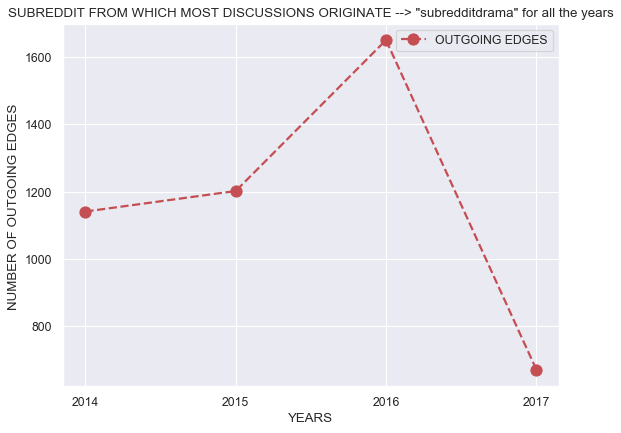

Wall time: 275 ms


In [41]:
%%time
sns.set()
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df['YEARS'] = df['YEARS'].astype(str)
plt.plot(df['YEARS'],df['count'],'ro--',label = 'OUTGOING EDGES',linewidth=2,markersize=10)
plt.xlabel("YEARS")
plt.ylabel("NUMBER OF OUTGOING EDGES ")
plt.title('SUBREDDIT FROM WHICH MOST DISCUSSIONS ORIGINATE --> "subredditdrama" for all the years')
plt.legend()
plt.show()

In [43]:
df_all = pd.read_sql_query('select SOURCE_SUBREDDIT,TARGET_SUBREDDIT,HOUR,DAYS,POST_ID,count(*) as count from subreddit group by HOUR order by count desc',conn)

In [44]:
df_all

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,HOUR,DAYS,POST_ID,count
0,1hp,globaloffensive,14,Sun,2v89zws,1622
1,1022,guns,13,Sun,64b8njs,1599
2,105gamergatefa14,kotakuinaction,11,Tue,2lzvmus,1581
3,100yearclub,askreddit,12,Sat,5pcjhws,1564
4,2007scape,runescape,15,Wed,1vbdzls,1462
5,0x10c,ixion,10,Wed,27saiys,1433
6,12monkeys,help,9,Fri,4xi1evs,1398
7,1000wordstories,writing,16,Sat,51cfkqs,1398
8,1204testcss,battleborn,17,Sat,4ml6bls,1370
9,07scape,osrstranscripts,19,Thu,4awitvs,1328


In [9]:
#dates into days of the week 
#df_all['day_name']=df_all['TIMESTAMP'].dt.day_name()
#hour of the time
#df_all['hour'] = df_all['TIMESTAMP'].dt.hour


Wall time: 1.36 s


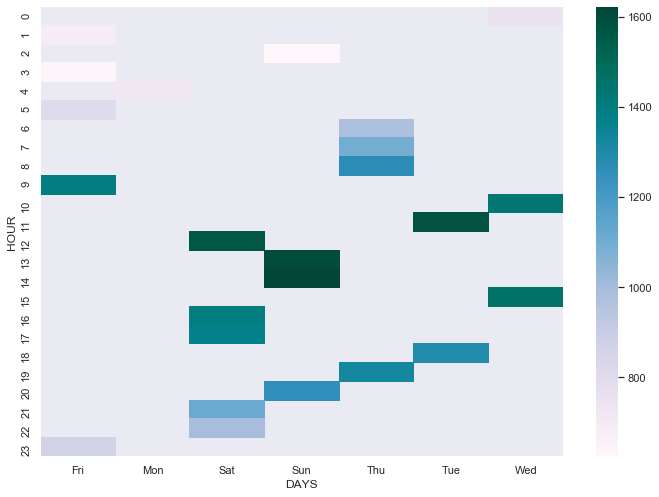

In [45]:
%%time
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_all.rename(columns={'count': 'NO OF POSTS'}, inplace=True)
heatmap_data = pd.pivot_table(df_all, values='NO OF POSTS', index= ['HOUR'], columns='DAYS')
sns.heatmap(heatmap_data, cmap="PuBuGn")

In [14]:
df_2015_new = pd.read_sql_query('select * from subreddit where TARGET_SUBREDDIT = "askreddit" and YEAR = 2015',conn)
df_2016_new = pd.read_sql_query('select * from subreddit where TARGET_SUBREDDIT = "mhoc" and YEAR = 2016',conn)
df_2017_new = pd.read_sql_query('select * from subreddit where TARGET_SUBREDDIT = "writingprompts" and YEAR = 2017',conn)

In [19]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "9936"
graph = Graph(uri = uri, user = user, password = password)
graph.delete_all
tx = graph.begin()


for i in range(len(df_2017_new)):
    src = Node('Subreddit', name = str(df_2017_new['SOURCE_SUBREDDIT'][i]),id = str(df_2017_new['SOURCE_SUBREDDIT'][i]))
    tx.merge(src,'Subreddit','name')
    trg = Node('Subreddit', name = str(df_2017_new['TARGET_SUBREDDIT'][i]), id = str(df_2017_new['TARGET_SUBREDDIT'][i]))
    tx.merge(trg,'Subreddit', 'name')
    rel = Relationship(src, str(df_2017_new['LINK_SENTIMENT'][i]),trg)
    tx.create(rel)

tx.commit()

In [24]:
df_link = pd.read_sql_query('select * from subreddit where LINK_SENTIMENT = 1',conn)

In [25]:
df_link

,level_0,Unnamed:0,index,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,Unnamed:9,...,Unnamed:107,Unnamed:108,Unnamed:109,Unnamed:110,Unnamed:111,Unnamed:112,Unnamed:113,YEAR,HOUR,DAYS
0,1,173703,1703704,07scape,osrstranscripts,4awitvs,17-03-2016 19:43,1,"5519.0,4803.0,0.720601558253,0.0338829498097,0...",None,...,None,None,None,None,None,None,None,2016,19,Thu
1,2,129593,909594,0magick,occult,3n8rqps,02-10-2015 23:47,1,"1672.0,1403.0,0.73504784689,0.00717703349282,0...",None,...,None,None,None,None,None,None,None,2015,23,Fri
2,3,26112,56113,0x10c,ixion,27saiys,28-05-2014 10:02,1,"304.0,266.0,0.766447368421,0.0164473684211,0.0...",None,...,None,None,None,None,None,None,None,2014,10,Wed
3,4,220383,2750384,1000wordstories,writing,51cfkqs,10-09-2016 16:49,1,"805.0,683.0,0.754037267081,0.0149068322981,0.0...",None,...,None,None,None,None,None,None,None,2016,16,Sat
4,5,73871,353872,100daysofketo,keto,2wf5qls,19-02-2015 08:03,1,"1425.0,1196.0,0.750175438596,0.020350877193,0....",None,...,None,None,None,None,None,None,None,2015,8,Thu
5,6,631,632,100movies365days,movieaweek,1ul33ms,06-01-2014 19:38,1,"2294.0,1927.0,0.755013077594,0.0130775937228,0...",None,...,None,None,None,None,None,None,None,2014,19,Mon
6,7,187357,1897358,100thieves,leagueoflegends,4ik7ois,09-05-2016 04:44,1,"286.0,250.0,0.776223776224,0.0174825174825,0.0...",None,...,None,None,None,None,None,None,None,2016,4,Mon
7,8,255780,3505781,100yearclub,askreddit,5pcjhws,21-01-2017 12:01,1,"3069.0,2596.0,0.741935483871,0.0293255131965,0...",None,...,None,None,None,None,None,None,None,2017,12,Sat
8,9,279976,4059977,1022,guns,64b8njs,09-04-2017 13:41,1,"2022.0,1665.0,0.7784371909,0.00741839762611,0....",None,...,None,None,None,None,None,None,None,2017,13,Sun
9,10,166367,1526368,104thworldproblems,thebeach,471k4ys,22-02-2016 08:27,1,"197.0,179.0,0.776649746193,0.0203045685279,0.0...",None,...,None,None,None,None,None,None,None,2016,8,Mon


In [23]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "9936"
graph = Graph(uri = uri, user = user, password = password)
graph.delete_all
tx = graph.begin()


for i in range(len(df_link)):
    src = Node('Subreddit', name = str(df_link['SOURCE_SUBREDDIT'][i]),id = str(df_link['SOURCE_SUBREDDIT'][i]))
    tx.merge(src,'Subreddit','name')
    trg = Node('Subreddit', name = str(df_link['TARGET_SUBREDDIT'][i]), id = str(df_link['TARGET_SUBREDDIT'][i]))
    tx.merge(trg,'Subreddit', 'name')
    rel = Relationship(src, str(df_link['LINK_SENTIMENT'][i]),trg)
    tx.create(rel)

tx.commit()

In [27]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "9936"
graph = Graph(uri = uri, user = user, password = password)
graph.delete_all
tx = graph.begin()


for i in range(len(df_link)):
    src = Node('Subreddit', name = str(df_link['SOURCE_SUBREDDIT'][i]),id = str(df_link['SOURCE_SUBREDDIT'][i]))
    tx.merge(src,'Subreddit','name')
    trg = Node('Subreddit', name = str(df_link['TARGET_SUBREDDIT'][i]), id = str(df_link['TARGET_SUBREDDIT'][i]))
    tx.merge(trg,'Subreddit', 'name')
    rel = Relationship(src, str(df_link['LINK_SENTIMENT'][i]),trg)
    tx.create(rel)

tx.commit()